<a href="https://colab.research.google.com/github/cmcoto/Book-Crossing-DeepLearning/blob/master/Book_Crossing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**First Import FAST.AI So I can use many tools...Don't know yet what I might need!**

In [3]:
!curl https://course-v3.fast.ai/setup/colab | bash

100   665  100   665    0     0    116      0  0:00:05  0:00:05 --:--:--   208
    100% |████████████████████████████████| 5.7MB 7.2MB/s 
  Found existing installation: Pillow 4.0.0
    Uninstalling Pillow-4.0.0:
      Successfully uninstalled Pillow-4.0.0
Looking in links: https://download.pytorch.org/whl/nightly/cu92/torch_nightly.html
    100% |████████████████████████████████| 576.5MB 26kB/s 
tcmalloc: large alloc 1073750016 bytes == 0x62446000 @  0x7f69df7ac2a4 0x591a07 0x5b5d56 0x502e9a 0x506859 0x502209 0x502f3d 0x506859 0x504c28 0x502540 0x502f3d 0x506859 0x504c28 0x502540 0x502f3d 0x506859 0x504c28 0x502540 0x502f3d 0x507641 0x502209 0x502f3d 0x506859 0x504c28 0x502540 0x502f3d 0x507641 0x504c28 0x502540 0x502f3d 0x507641
Cloning into 'course-v3'...
remote: Enumerating objects: 2450, done.
remote: Total 2450 (delta 0), reused 0 (delta 0), pack-reused 2450
Receiving objects: 100% (2450/2450), 59.09 MiB | 28.35 MiB/s, done.
Resolving deltas: 100% (1338/1338), done.
    100% |███

**Connect Google Drive!**

In [4]:
from google.colab import *
drive.mount('/content/gdrive', force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


Check that it mounted Correctly!

In [5]:
with open('/content/gdrive/My Drive/data/foo.txt', 'w') as f:
  f.write('Hello Google Drive!')
!cat /content/gdrive/My\ Drive/foo.txt

Hello Google Drive!

Get Path! To read csv file

In [6]:
!ls "/content/gdrive/My Drive/data/bookCrossing"

BX-Book-Ratings.csv  BX-Books.csv  BX-Users.csv


GET THE **DATA**

In [0]:
import pandas as pd
import numpy as np


In [0]:
ratings = pd.read_csv('/content/gdrive/My Drive/data/bookCrossing/BX-Book-Ratings.csv', delimiter=";", encoding="latin1")
ratings.columns = ['userId', 'ISBN', 'bookRating']

In [9]:
ratings.head(5)

,userId,ISBN,bookRating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [0]:
users = pd.read_csv('/content/gdrive/My Drive/data/bookCrossing/BX-Users.csv', delimiter=";", encoding="latin1")
users.columns = ['userId', 'location', 'age']

In [11]:
users.head()

,userId,location,age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [12]:
books = pd.read_csv('/content/gdrive/My Drive/data/bookCrossing/BX-Books.csv', delimiter=";", encoding="latin-1", error_bad_lines=False)
books.columns = ['ISBN', 'bookTitle', 'bookAuthor', 'yearOfPublication', 'publisher', 'imageURLS', 'imageURLM', 'imageURLL']

b'Skipping line 6452: expected 8 fields, saw 9\nSkipping line 43667: expected 8 fields, saw 10\nSkipping line 51751: expected 8 fields, saw 9\n'
b'Skipping line 92038: expected 8 fields, saw 9\nSkipping line 104319: expected 8 fields, saw 9\nSkipping line 121768: expected 8 fields, saw 9\n'
b'Skipping line 144058: expected 8 fields, saw 9\nSkipping line 150789: expected 8 fields, saw 9\nSkipping line 157128: expected 8 fields, saw 9\nSkipping line 180189: expected 8 fields, saw 9\nSkipping line 185738: expected 8 fields, saw 9\n'
b'Skipping line 209388: expected 8 fields, saw 9\nSkipping line 220626: expected 8 fields, saw 9\nSkipping line 227933: expected 8 fields, saw 11\nSkipping line 228957: expected 8 fields, saw 10\nSkipping line 245933: expected 8 fields, saw 9\nSkipping line 251296: expected 8 fields, saw 9\nSkipping line 259941: expected 8 fields, saw 9\nSkipping line 261529: expected 8 fields, saw 9\n'
/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:27

In [13]:
books.head()

,ISBN,bookTitle,bookAuthor,yearOfPublication,publisher,imageURLS,imageURLM,imageURLL
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [14]:
print(ratings.shape)
print(users.shape)
print(books.shape)


(1149780, 3)
(278858, 3)
(271360, 8)


Do we need the images column in Books? Probably not.

In [0]:
books.drop(['imageURLS','imageURLM','imageURLL'], axis=1, inplace=True)

In [16]:
books.head()

,ISBN,bookTitle,bookAuthor,yearOfPublication,publisher
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company


**DATA WRANGLING**

Let's check the Data Types... 


In [17]:
ratings.dtypes

userId         int64
ISBN          object
bookRating     int64
dtype: object

In [0]:
pd.set_option('display.max_colwidth', -1)

In [19]:
ratings['bookRating'].unique()

array([ 0,  5,  3,  6,  8,  7, 10,  9,  4,  1,  2])

In [20]:
users.dtypes

userId      int64  
location    object 
age         float64
dtype: object

In [21]:
books.dtypes


ISBN                 object
bookTitle            object
bookAuthor           object
yearOfPublication    object
publisher            object
dtype: object

For Data wrangling, I will follow some of the steps used by Chhavi Saluja, in: [TowardsDataScience](https://towardsdatascience.com/my-journey-to-building-book-recommendation-system-5ec959c41847)

In [22]:
books.yearOfPublication.unique()

array([2002, 2001, 1991, 1999, 2000, 1993, 1996, 1988, 2004, 1998, 1994,
       2003, 1997, 1983, 1979, 1995, 1982, 1985, 1992, 1986, 1978, 1980,
       1952, 1987, 1990, 1981, 1989, 1984, 0, 1968, 1961, 1958, 1974,
       1976, 1971, 1977, 1975, 1965, 1941, 1970, 1962, 1973, 1972, 1960,
       1966, 1920, 1956, 1959, 1953, 1951, 1942, 1963, 1964, 1969, 1954,
       1950, 1967, 2005, 1957, 1940, 1937, 1955, 1946, 1936, 1930, 2011,
       1925, 1948, 1943, 1947, 1945, 1923, 2020, 1939, 1926, 1938, 2030,
       1911, 1904, 1949, 1932, 1928, 1929, 1927, 1931, 1914, 2050, 1934,
       1910, 1933, 1902, 1924, 1921, 1900, 2038, 2026, 1944, 1917, 1901,
       2010, 1908, 1906, 1935, 1806, 2021, '2000', '1995', '1999', '2004',
       '2003', '1990', '1994', '1986', '1989', '2002', '1981', '1993',
       '1983', '1982', '1976', '1991', '1977', '1998', '1992', '1996',
       '0', '1997', '2001', '1974', '1968', '1987', '1984', '1988',
       '1963', '1956', '1970', '1985', '1978', '1973', '1980'

The Types are mixed, between Integers and Strings... Must set one type. Then there are wrong Data, in that they have set Publisher instead of year of publication 'Dk Publishing' and ''Gallimard'. There are also some numbers that make no sense...like 0, # > 2004... Need to take care of them also.

In [30]:
books.loc[books.yearOfPublication == 'DK Publishing Inc',:]

,ISBN,bookTitle,bookAuthor,yearOfPublication,publisher
209538,078946697X,"DK Readers: Creating the X-Men, How It All Began (Level 4: Proficient Readers)\"";Michael Teitelbaum""",2000,DK Publishing Inc,http://images.amazon.com/images/P/078946697X.01.THUMBZZZ.jpg
221678,0789466953,"DK Readers: Creating the X-Men, How Comic Books Come to Life (Level 4: Proficient Readers)\"";James Buckley""",2000,DK Publishing Inc,http://images.amazon.com/images/P/0789466953.01.THUMBZZZ.jpg


In [0]:
books.loc[books.ISBN == '078946697X','yearOfPublication'] = 2000
books.loc[books.ISBN == '078946697X','bookAuthor'] = "Michael Teitelbaum"
books.loc[books.ISBN == '078946697X','publisher'] = "DK Publishing Inc"



In [0]:
books.loc[books.ISBN == '0789466953', 'yearOfPublication'] = 2000
books.loc[books.ISBN == '0789466953', 'bookAuthor'] = "James Buckley"
books.loc[books.ISBN == '0789466953', 'publisher'] = "DK Publishing Inc"

In [42]:
books.loc[books.yearOfPublication == 'Gallimard']

,ISBN,bookTitle,bookAuthor,yearOfPublication,publisher
220731,2070426769,"Peuple du ciel, suivi de 'Les Bergers\"";Jean-Marie Gustave Le ClÃ?Â©zio""",2003,Gallimard,http://images.amazon.com/images/P/2070426769.01.THUMBZZZ.jpg


In [0]:
books.loc[books.ISBN == '2070426769','yearOfPublication'] = 2003
books.loc[books.ISBN == '2070426769','bookAuthor'] = 'Jean-Marie Gustave Le ClÃ?Â©zio'
books.loc[books.ISBN == '2070426769','publisher'] = 'Gallimard'

In [0]:
books.yearOfPublication = pd.to_numeric(books.yearOfPublication)

In [52]:
sorted(books['yearOfPublication'].unique())

[0,
 1376,
 1378,
 1806,
 1897,
 1900,
 1901,
 1902,
 1904,
 1906,
 1908,
 1909,
 1910,
 1911,
 1914,
 1917,
 1919,
 1920,
 1921,
 1922,
 1923,
 1924,
 1925,
 1926,
 1927,
 1928,
 1929,
 1930,
 1931,
 1932,
 1933,
 1934,
 1935,
 1936,
 1937,
 1938,
 1939,
 1940,
 1941,
 1942,
 1943,
 1944,
 1945,
 1946,
 1947,
 1948,
 1949,
 1950,
 1951,
 1952,
 1953,
 1954,
 1955,
 1956,
 1957,
 1958,
 1959,
 1960,
 1961,
 1962,
 1963,
 1964,
 1965,
 1966,
 1967,
 1968,
 1969,
 1970,
 1971,
 1972,
 1973,
 1974,
 1975,
 1976,
 1977,
 1978,
 1979,
 1980,
 1981,
 1982,
 1983,
 1984,
 1985,
 1986,
 1987,
 1988,
 1989,
 1990,
 1991,
 1992,
 1993,
 1994,
 1995,
 1996,
 1997,
 1998,
 1999,
 2000,
 2001,
 2002,
 2003,
 2004,
 2005,
 2006,
 2008,
 2010,
 2011,
 2012,
 2020,
 2021,
 2024,
 2026,
 2030,
 2037,
 2038,
 2050]

In [54]:
books.loc[books.yearOfPublication == 0,:]

,ISBN,bookTitle,bookAuthor,yearOfPublication,publisher
176,3150000335,Kabale Und Liebe,Schiller,0,"Philipp Reclam, Jun Verlag GmbH"
188,342311360X,Die Liebe in Den Zelten,Gabriel Garcia Marquez,0,Deutscher Taschenbuch Verlag (DTV)
288,0571197639,Poisonwood Bible Edition Uk,Barbara Kingsolver,0,Faber Faber Inc
351,3596214629,"Herr Der Fliegen (Fiction, Poetry and Drama)",Golding,0,Fischer Taschenbuch Verlag GmbH
542,8845229041,Biblioteca Universale Rizzoli: Sulla Sponda Del Fiume Piedra,P Coelho,0,Fabbri - RCS Libri
641,0345251733,Rainbow the Stormy Life of Judy Garland,Christopher Finch,0,Ballantine Books
646,0590021117,Little House On the Prairie,Laura Ingall Wilder,0,Scholastic Inc
728,2070362388,Ravage,Rene Barjavel,0,Gallimard French
732,2266033689,Le Diable Au Corps,Raymond Radiguet,0,Presses Pocket French
735,2070334368,La Guerre Des Boutons,Pergaud,0,Livre de Poche


O.k. so there are a lot of books with yearOfPublication == 0. 

In [53]:
books.loc[books.yearOfPublication == 1376,:]


,ISBN,bookTitle,bookAuthor,yearOfPublication,publisher
253750,964442011X,Tasht-i khun,IsmaÂ°il Fasih,1376,Nashr-i Alburz


O.k. So Now that we have the data ready... let's prepare our dataset, combining some parts of the three tables into one that means something, at least to me...?!

Let's use Pandas merge function to merge the ratings table with parts of the book table... 

In [0]:
rating_book = pd.merge(ratings, books, on='ISBN')

In [56]:
rating_book.head()

,userId,ISBN,bookRating,bookTitle,bookAuthor,yearOfPublication,publisher
0,276725,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books
1,2313,034545104X,5,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books
2,6543,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books
3,8680,034545104X,5,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books
4,10314,034545104X,9,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books


Keep merging the Tables...

In [0]:
all_ratings = pd.merge(rating_book, users, on='userId')

**Check the new Data Set...**

In [59]:
all_ratings.head()

,userId,ISBN,bookRating,bookTitle,bookAuthor,yearOfPublication,publisher,location,age
0,276725,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,"tyler, texas, usa",NaN
1,2313,034545104X,5,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,"cincinnati, ohio, usa",23.0
2,2313,0812533550,9,Ender's Game (Ender Wiggins Saga (Paperback)),Orson Scott Card,1986,Tor Books,"cincinnati, ohio, usa",23.0
3,2313,0679745580,8,In Cold Blood (Vintage International),TRUMAN CAPOTE,1994,Vintage,"cincinnati, ohio, usa",23.0
4,2313,0060173289,9,Divine Secrets of the Ya-Ya Sisterhood : A Novel,Rebecca Wells,1996,HarperCollins,"cincinnati, ohio, usa",23.0


O.K. Let's Rock n Roll! Time to check out the Data... with Deep Learning!
Time to load up** Fast.ai**

In [0]:
from fastai import *
from fastai.collab import *

Create a CollabDataBunch

In [0]:
data = CollabDataBunch.from_df(all_ratings, seed=42, pct_val=0.1, item_name="bookTitle")

In [62]:
data.show_batch()

userId,bookTitle,target
27912,The Witch of Blackbird Pond (Yearling Newbery),6.0
234828,Perma Red,0.0
127233,Giovanni's Gift,0.0
10351,"A Journey to the New World: The Diary of Remember Patience Whipple, Mayflower, 1620 (Dear America Series)",8.0
217701,Die RosenzÃ?Â¼chterin.,0.0
269841,Angel Eyes,0.0
271284,The Los Alamos Contract,0.0
99204,Deck the Halls (Holiday Classics),8.0


Create a Collab_learner

In [0]:
learn = collab_learner(data, n_factors=20,  y_range=(0.,10.0))

In [71]:
learn.lr_find()

epoch,train_loss,valid_loss


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


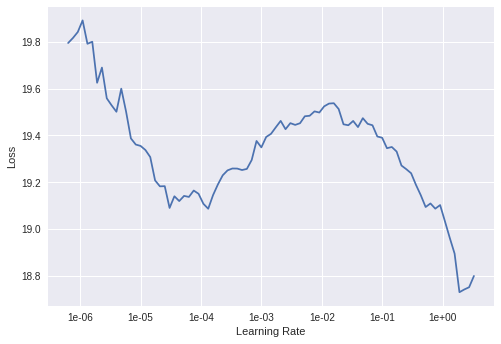

In [72]:
learn.recorder.plot()

In [0]:
learn = collab_learner(data, n_factors=40,  y_range=(0.,10.0))

In [74]:
learn.lr_find()

epoch,train_loss,valid_loss


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


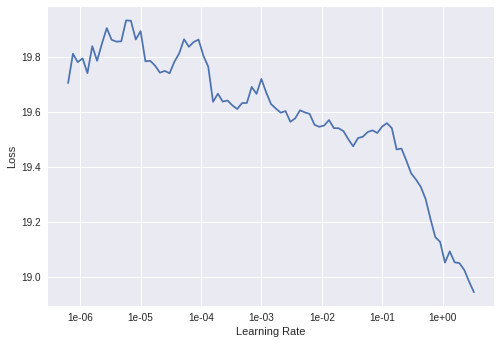

In [75]:
learn.recorder.plot()

In [0]:
learn = collab_learner(data, n_factors=80,  y_range=(0.,10.0))

In [80]:
learn.lr_find()

epoch,train_loss,valid_loss


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


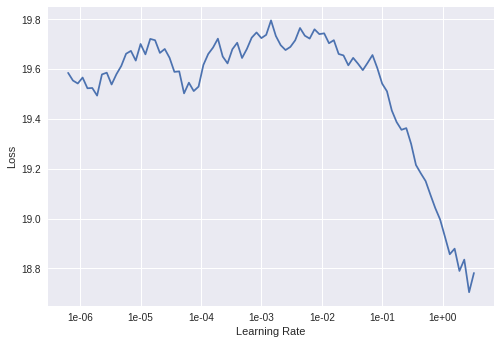

In [81]:
learn.recorder.plot()

O.k. Now, lets try a Fit...using 40 factors... we see in the plot that we could use the Learning Rate...

In [82]:
learn.fit_one_cycle(5, 5e-3)

Total time: 28:46
epoch  train_loss  valid_loss
1      12.138045   12.209110   (05:43)
2      10.499359   12.397071   (05:46)
3      6.747427    12.863529   (05:45)
4      4.499286    13.013429   (05:45)
5      2.643999    13.103231   (05:44)



In [0]:
learn.save('book_fit1')